In [1]:
# Inspecting and monitoring deep-learning models using Keras callbacks and TensorBoard

In [2]:
# Using callbacks to act on a model during training

# A callback is an object (a class instance implementing specific methods) 
# that is passed to the model in the call to fit 
# and that is called by the model at various points during training. 
# It has access to all the available data about the state of the model 
# and its performance, and it can take action: 
# interrupt training, save a model, load a different weight set, 
# or otherwise alter the state of the model.

In [3]:
# Introduction to TensorBoard: the TensorFlow visualization framework

In [4]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.utils.data_utils import pad_sequences


max_features = 2000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
                           input_length=max_len,
                           name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 500, 128)          256000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

2022-08-30 03:05:51.242822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-30 03:05:51.245220: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='tensorboard_log',
        histogram_freq=1,
        embeddings_freq=1,
    )
]
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/20
157/157 [==============================] - 15s 90ms/step - loss: 0.6733 - acc: 0.6211 - val_loss: 0.4195 - val_acc: 0.8358
Epoch 2/20
157/157 [==============================] - 14s 90ms/step - loss: 0.4512 - acc: 0.8452 - val_loss: 0.4476 - val_acc: 0.8574
Epoch 3/20
157/157 [==============================] - 14s 92ms/step - loss: 0.4035 - acc: 0.8718 - val_loss: 0.4791 - val_acc: 0.8618
Epoch 4/20
157/157 [==============================] - 15s 94ms/step - loss: 0.3529 - acc: 0.8947 - val_loss: 0.9033 - val_acc: 0.7950
Epoch 5/20
157/157 [==============================] - 14s 92ms/step - loss: 0.2980 - acc: 0.9133 - val_loss: 0.5253 - val_acc: 0.8632
Epoch 6/20
157/157 [==============================] - 15s 94ms/step - loss: 0.2678 - acc: 0.9281 - val_loss: 0.7630 - val_acc: 0.8484
Epoch 7/20
157/157 [==============================] - 14s 92ms/step - loss: 0.2269 - acc: 0.9459 - val_loss: 0.7531 - val_acc: 0.8578
Epoch 8/20
157/157 [==============================] - 14s 90ms

the Histograms tab, where you can find pretty visualizations of histograms of activation values taken by your layers

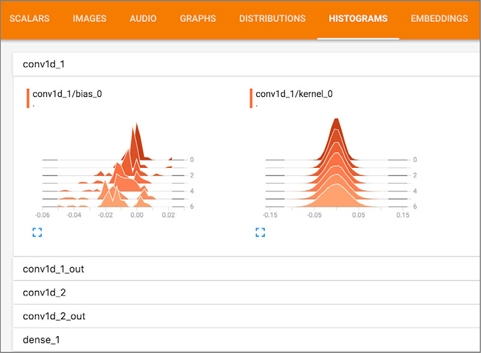

The Embeddings tab gives you a way to inspect the embedding locations and spatial
relationships of the 10,000 words in the input vocabulary, as learned by the initial
Embedding layer. Because the embedding space is 128-dimensional, TensorBoard auto-
matically reduces it to 2D or 3D using a dimensionality-reduction algorithm of your
choice: either principal component analysis (PCA) or t-distributed stochastic neighbor
embedding (t-SNE).